In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from sklearn.utils import shuffle
# Any results you write to the current directory are saved as output.

['student-merge.R', 'student-mat.csv', 'student-por.csv']


In [86]:
data1 = pd.read_csv("../input/student-mat.csv",sep=",")
data2 = pd.read_csv("../input/student-por.csv",sep=",")
data = [data1,data2]
data=pd.concat(data)
data=shuffle(data)

In [87]:
data=data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

percentage total female :  58.91238670694864
percentage total male :  41.08761329305136


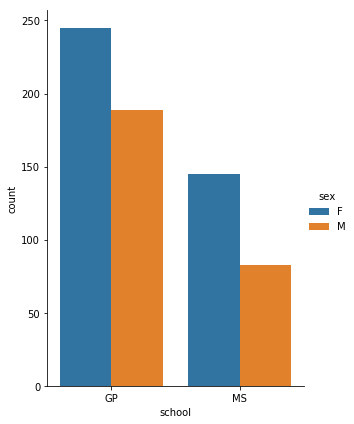

In [88]:
sns.catplot(x="school", hue = "sex" , data=data , kind="count",height=6, aspect=.7)
print("percentage total female : ",(data["sex"] == 'F').value_counts(normalize = True)[1]*100)
print("percentage total male : ",(data["sex"] == 'M').value_counts(normalize = True)[1]*100)

It is clear that number of female students are more than number of male students in both the  schools, with 'GP' - Gabriel Pereira school having more number of students overall.  

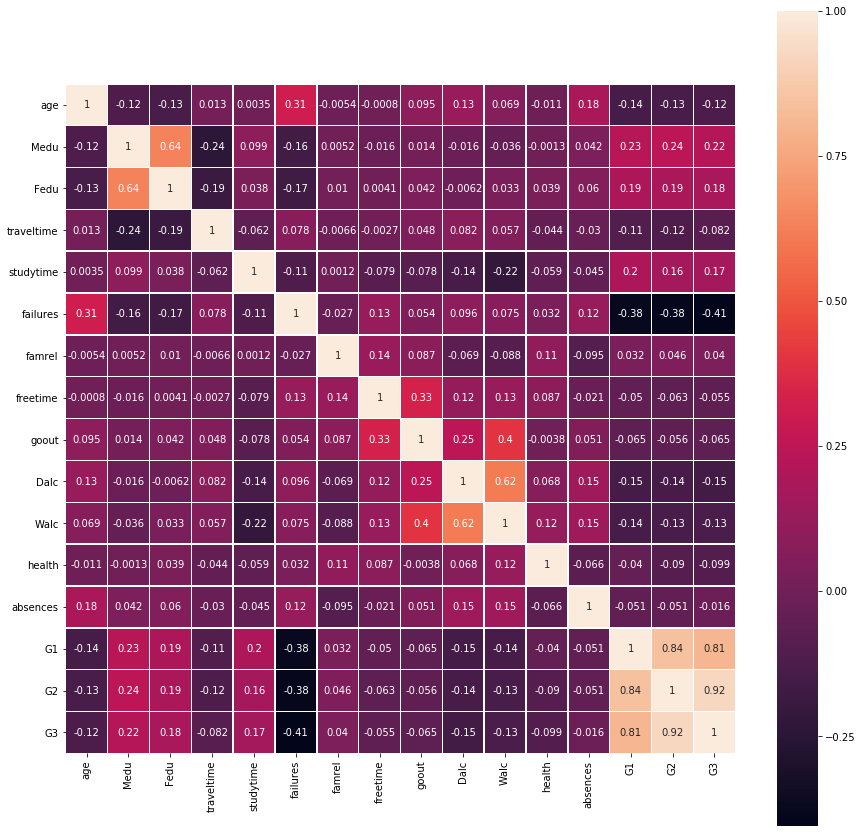

In [89]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(15, 15))
hmap = sns.heatmap(data.corr(), square=True, annot=True,linewidths=0.5)

**Statements based on heatmap values**
We can observe few good  correlation values between health and alcohol consumption also alcohol consumption with failures. And also as expected study time has a good correlation value with grades and father edu, mother edu and failures also have good correlation values with grades and first period and second period grades matter a lot to the final grade(high corrleation values). Surprisingly absences and health have low correlation values with the grades.

In [90]:
#drop some features that have very less correlation values with grades
data = data.drop(["traveltime","famrel","freetime","goout","health","absences"], axis=1)

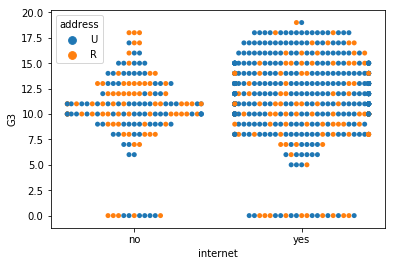

In [91]:
sns.swarmplot(x="internet",y="G3",hue='address',data=data)

It seems most of the urban people are having internet availability and also performing better than rural people.

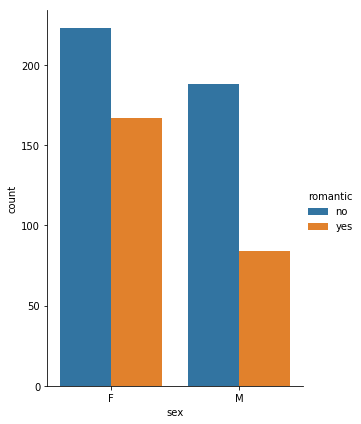

In [92]:
sns.catplot(x="sex", hue = "romantic", data=data , kind="count",height=6, aspect=.7)

It seems females have a higher chance of being in a relationship than male students. 

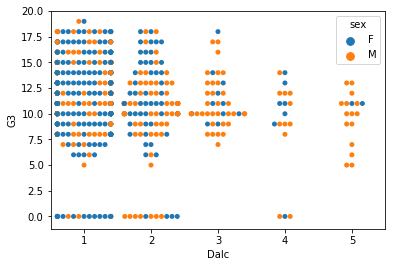

In [93]:
sns.swarmplot(x="Dalc",y="G3",hue="sex",data=data)

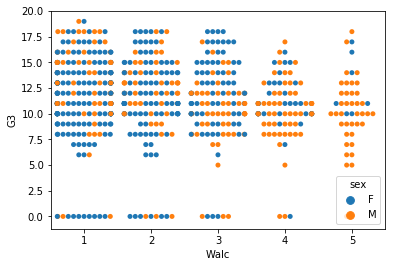

In [94]:
sns.swarmplot(x="Walc",y="G3",hue="sex",data=data)

It seems very large amount of people drink very low alcohol(1) during both weekend and work days. Most of the people who drink high(4,5) are male and also people who drink high during work days are getting bit lower grades than that of others.  

In [95]:
#to suppress the warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [96]:
#data cleaning(binary and onehot encodings)
data.school[data.school == 'GP'] = 1
data.school[data.school == 'MS'] = 0
data.sex[data.sex == 'M'] = 1
data.sex[data.sex == 'F'] = 0
data.address[data.address == 'U'] = 1
data.address[data.address == 'R'] = 0
data.famsize[data.famsize == 'GT3'] = 1
data.famsize[data.famsize == 'LE3'] = 0
data.Pstatus[data.Pstatus == 'T'] = 1
data.Pstatus[data.Pstatus == 'A'] = 0
#for Medu & Fedu its better in numeric as higher education has higher difference with primary than secondary
#one hot encoding of necessary features
cols_to_transform = [ 'Mjob','Fjob','reason','guardian' ]
data=pd.get_dummies(data,columns=cols_to_transform) 
#failures, traveltime, studytime does not require onehot  

In [97]:
data.schoolsup[data.schoolsup == 'yes'] = 1
data.schoolsup[data.schoolsup == 'no'] = 0
data.famsup[data.famsup == 'yes'] = 1
data.famsup[data.famsup == 'no'] = 0
data.paid[data.paid == 'yes'] = 1
data.paid[data.paid == 'no'] = 0
data.activities[data.activities == 'yes'] = 1
data.activities[data.activities == 'no'] = 0
data.nursery[data.nursery == 'yes'] = 1
data.nursery[data.nursery == 'no'] = 0
data.higher[data.higher == 'yes'] = 1
data.higher[data.higher == 'no'] = 0
data.internet[data.internet == 'yes'] = 1
data.internet[data.internet == 'no'] = 0
data.romantic[data.romantic == 'yes'] = 1
data.romantic[data.romantic == 'no'] = 0
#remaining doesn't require onehot as distances are not same. one hot is used only when they are equidistant
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
232,1,0,17,1,1,1,2,3,1,0,0,1,0,0,1,1,0,0,1,4,12,13,13,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
46,1,0,16,1,0,0,3,3,2,0,0,1,0,0,1,1,1,0,1,4,11,12,11,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
35,1,0,15,1,1,1,2,3,1,0,0,1,0,1,1,1,0,0,1,1,11,11,11,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
18,1,1,17,1,1,1,3,2,1,3,0,1,0,1,1,1,1,0,2,4,6,5,5,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
482,0,0,15,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,3,9,10,9,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
233,1,1,16,1,1,1,4,4,2,0,0,1,1,1,1,1,1,0,2,4,14,13,13,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
138,1,1,15,0,1,1,3,4,2,0,0,1,0,0,1,1,0,1,1,1,12,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
381,1,0,17,1,1,1,4,4,3,0,0,1,0,0,0,1,1,1,1,2,15,14,15,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
586,0,0,17,1,1,1,4,2,2,0,1,1,0,1,1,1,1,0,1,3,8,8,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
135,1,0,15,1,1,1,4,4,3,0,0,1,0,1,1,1,1,1,1,1,11,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0


In [98]:
#Final grades
y =  data[[ 'G3']].mean(axis=1)
data = data.drop(["G3"], axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Dalc,Walc,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
232,1,0,17,1,1,1,2,3,1,0,0,1,0,0,1,1,0,0,1,4,12,13,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
46,1,0,16,1,0,0,3,3,2,0,0,1,0,0,1,1,1,0,1,4,11,12,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
35,1,0,15,1,1,1,2,3,1,0,0,1,0,1,1,1,0,0,1,1,11,11,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
18,1,1,17,1,1,1,3,2,1,3,0,1,0,1,1,1,1,0,2,4,6,5,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
482,0,0,15,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,3,9,10,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [104]:
#spliting data to train and test by 80% and 20% respectievely 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.2)

Mean squared error: 2.29
Mean difference: 0.83
r2 score: 0.84


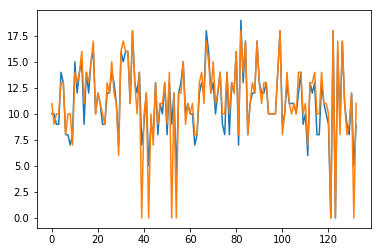

In [136]:
# training the model on training set using linear regression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 2.19
Mean difference: 0.86
r2 score: 0.85


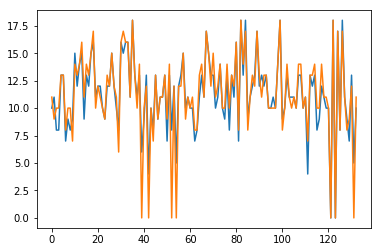

In [137]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
y_pred =np.round(rf.predict(X_test))
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 2.31
Mean difference: 0.89
r2 score: 0.84


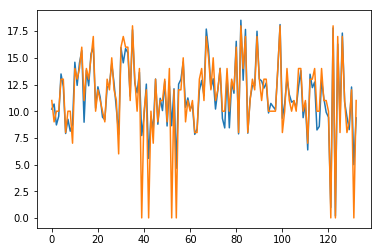

In [138]:
#svm regressor
from sklearn.svm import SVR
regressor=SVR(kernel="linear",epsilon=1.0,degree=3)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 2.27
Mean difference: 1.01
r2 score: 0.84


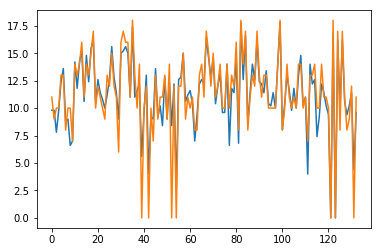

In [139]:
#knearest neighbhors
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

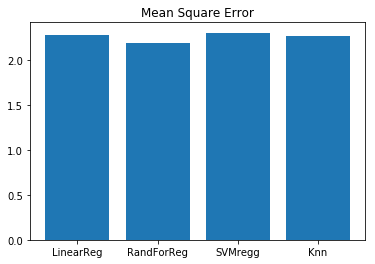

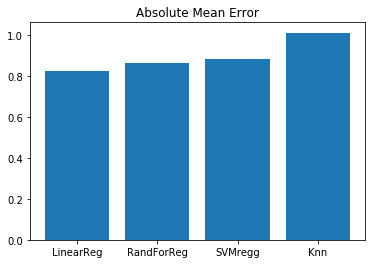

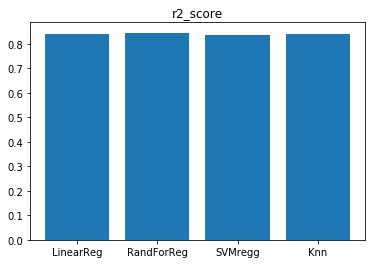

In [140]:
objects=('LinearReg','RandForReg','SVMregg','Knn')
plt.bar(np.arange(len(meansqr)),meansqr)
plt.xticks(np.arange(len(meansqr)), objects)
plt.title('Mean Square Error')
plt.show()
plt.bar(np.arange(len(Avgdiff)),Avgdiff)
plt.xticks(np.arange(len(Avgdiff)), objects)
plt.title('Absolute Mean Error')
plt.show()
plt.bar(np.arange(len(r2)),r2)
plt.xticks(np.arange(len(r2)), objects)
plt.title('r2_score')
plt.show()


R_2 score or R squared coefficient is a statistical measure of how well the data is fit to the regression lines.
If the r_2 score is 0 that implies a bad model and r_2 is equal to 1 for an ideal model.
In this we got r2_score of around 0.85 which implies it is a good fit considering the data set size.

* Firstly I used linear regresion to predict but we know that it cannot learn some complex features for better prediction.
* Randomn forest regressor uses more computation than other techniques used and also performs better than other techniques.
* SVM is known for its performance of smaller datasets and also robust to deveations but svm is used for classification tasks widely.
* KNN is widely used for classification task. It is known for it's simple and less time consuming algorithm than others and performs good in case of classification tasks but not in case of regression tasks.

**We got mean squares error of around 2 .2 and absolute mean error around 0.85 less than 1 and also r2_score of around 0.85 with ranndomnforest regressor doing the best. These models differ by very less margins considering the error scores I think the margin would be more if we could get more data and also errors would be less with more data.**